
# Databases with Python Pandas

## **Diego Tuccillo**




![pandas.jpg](../assets/pandas.jpg)



https://pandas.pydata.org



Pandas is a library for generating, manipulating and retriving data from a relational database. One of the reasons for the popularity of relational databases is that properly designed relational databases can handle huge amounts of data. 
With this library you can look at large datasets or you can zoom in on individual rows.

But what is a database? is nothing more than a set of related information. A telephone book for example is a databases. 
Because finding information in a large database is time consuming, one of the first computer applications developed were *database systems* which are computerized data storage and retrival mechanisms. 

### Non relational Databases

Over the first decades of computerized systems data were stored in various ways.
In a **hierarchical database system** the data is rapresented in one or more tree structures. Hierarchical database system provide tool to locate a particular tree and traversing the information inside it.


![hyerarcModel.png](../assets/hyerarcModel.png)

Another common approach called **network database system** exposes sets of records and sets of links that define relationships between different records. 

![network-model.jpg](../assets/network-model.jpg)


Both systems are alive, but starting from 1970 a new way to represent data began to take root.





### Relational databases

Data representd as sets of tables. Rather than using pointers to navigate between related entities, redundant data is used to link records in different tables. 

Each table in a relational database includes information that uniquely identifies a row in that table (known as primary key), along with additional information needed to describe the entity completely.



![relational-databases_2.png](../assets/relational-databases_2.png)



![relational-databases_1.jpg](../assets/relational-databases_1.jpg)




## Pandas


Contains high-level data structures and manipulation tools designed to make data analysis fast and easy in Python. pandas is built on top of NumPy and makes it easy to use in NumPy-centric applications.
Started building pandas in 2008.

The author of Pandas says:

At the time, I had a distinct set of requirements that were not well-addressed by any single tool at my disposal:

• Data structures with labeled axes supporting automatic or explicit data alignment. This prevents common errors resulting from misaligned data and working with differently-indexed data coming from different sources.

• Integrated time series functionality.

• The same data structures handle both time series data and non-time series data.

• Arithmetic operations and reductions (like summing across an axis) would pass on the metadata (axis labels).

• Flexible handling of missing data.

• Merge and other relational operations found in popular database databases (SQL- based, for example).

--- 



## PART 1: introduction

In [1]:
!which python

/Users/carlosmeneses/Projects/tmp/uc-curso-2023/venv/bin/python


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#The data frame as a way to store data in rectangular grids that can easily be overviewed.
#Each row of these grids corresponds to measurements or values of an instance,
#while each column is a vector containing data for a specific variable

a = np.arange(12)+8
b = np.random.randn(12)
c = np.linspace(18.0, 25.0, num=12)  
    
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 

df 


,A,B,C
0,8,0.296234,18.000000
1,9,-0.529381,18.636364
2,10,1.109222,19.272727
3,11,-0.364855,19.909091
4,12,-1.048680,20.545455
5,13,0.063800,21.181818
6,14,1.241353,21.818182
7,15,-1.029007,22.454545
8,16,-0.130674,23.090909
9,17,2.093565,23.727273


In [3]:
#Now you can explore your dataframe.

df.head(0)

,A,B,C


In [4]:
print(df.head(3))

    A         B          C
0   8  0.296234  18.000000
1   9 -0.529381  18.636364
2  10  1.109222  19.272727


Question 1 : so what is doing with head?

In [5]:
# and indexes
df.index

RangeIndex(start=0, stop=12, step=1)

In [6]:
# a summary of all variables:

df.describe()

,A,B,C
count,12.000000,12.000000,12.000000
mean,13.500000,0.039768,21.500000
std,3.605551,1.062686,2.294442
min,8.000000,-1.575654,18.000000
25%,10.750000,-0.654288,19.750000
50%,13.500000,-0.033437,21.500000
75%,16.250000,0.540774,23.250000
max,19.000000,2.093565,25.000000


In [7]:
# I can calculate the frequence of a value:
a[0:3] = 3
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 

print(df)

df['A'].value_counts()

     A         B          C
0    3  0.296234  18.000000
1    3 -0.529381  18.636364
2    3  1.109222  19.272727
3   11 -0.364855  19.909091
4   12 -1.048680  20.545455
5   13  0.063800  21.181818
6   14  1.241353  21.818182
7   15 -1.029007  22.454545
8   16 -0.130674  23.090909
9   17  2.093565  23.727273
10  18  0.351292  24.363636
11  19 -1.575654  25.000000


A
3     3
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: count, dtype: int64

In [8]:
#it counts also non-numerical values:
a = a.astype(str)
a[3:9] = 'test'
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 
print(df)

df['A'].value_counts()

       A         B          C
0      3  0.296234  18.000000
1      3 -0.529381  18.636364
2      3  1.109222  19.272727
3   test -0.364855  19.909091
4   test -1.048680  20.545455
5   test  0.063800  21.181818
6   test  1.241353  21.818182
7   test -1.029007  22.454545
8   test -0.130674  23.090909
9     17  2.093565  23.727273
10    18  0.351292  24.363636
11    19 -1.575654  25.000000


A
test    6
3       3
17      1
18      1
19      1
Name: count, dtype: int64

<Axes: >

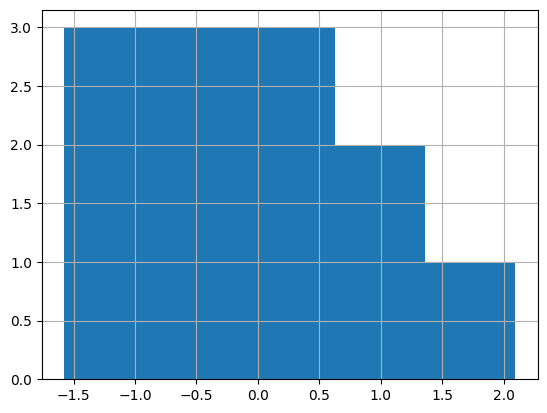

In [9]:
# I can quickly do an histogram

df['B'].hist(bins=5)

<Axes: >

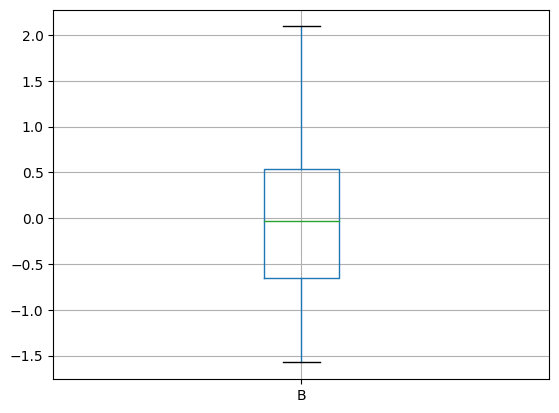

In [10]:
#or the boxplots:
df.boxplot(column='B')


Practice : try the boxplot of the whole dataframe. Do you have a missing column? why?

<Axes: >

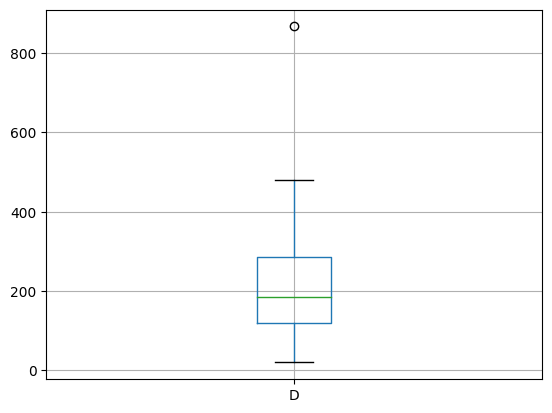

In [11]:
# As we said, boxplots are useful to detect outliers:

friendsOnFB = [20, 63, 140, 165, 178, 63, 191, 364, 260, 234, 867, 480]
d = friendsOnFB
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})

df.boxplot(column='D')

Note: visualize the dataframe after you modify it

         A         B          C    D
0   chicos  0.296234  18.000000   20
1   chicos -0.529381  18.636364   63
2   chicos  1.109222  19.272727  140
3   chicos -0.364855  19.909091  165
4   chicos -1.048680  20.545455  178
5   chicos  0.063800  21.181818   63
6   chicos  1.241353  21.818182  191
7   chicas -1.029007  22.454545  364
8   chicas -0.130674  23.090909  260
9   chicas  2.093565  23.727273  234
10  chicas  0.351292  24.363636  867
11  chicas -1.575654  25.000000  480


<Axes: title={'center': 'D'}, xlabel='A'>

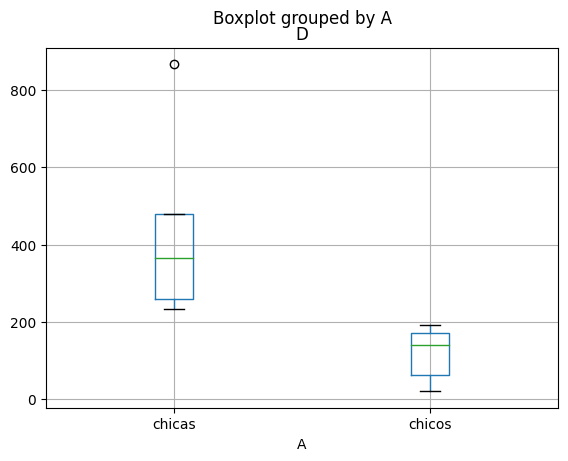

In [12]:
#and you can quickly look at trends:
a
a[0:7] = 'chicos'
a[7:12]= 'chicas'

df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})


print(df)

df.boxplot(column='D', by = 'A')

In [13]:
# A huge problem in data analysis are the missing values
b = b.astype(float)
b[5] = np.nan

df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})

df

,A,B,C,D
0,chicos,0.296234,18.000000,20
1,chicos,-0.529381,18.636364,63
2,chicos,1.109222,19.272727,140
3,chicos,-0.364855,19.909091,165
4,chicos,-1.048680,20.545455,178
5,chicos,NaN,21.181818,63
6,chicos,1.241353,21.818182,191
7,chicas,-1.029007,22.454545,364
8,chicas,-0.130674,23.090909,260
9,chicas,2.093565,23.727273,234


In [14]:
#with pandas you have various routines to deal with them. You can COUNT them:

df.apply(lambda x: sum(x.isnull()),axis=0) 

A    0
B    1
C    0
D    0
dtype: int64

In [15]:
# and you can fill the missing value with another inferred value, for example:
df['B'].fillna(df['B'].mean(), inplace=True)

In [16]:
df

,A,B,C,D
0,chicos,0.296234,18.000000,20
1,chicos,-0.529381,18.636364,63
2,chicos,1.109222,19.272727,140
3,chicos,-0.364855,19.909091,165
4,chicos,-1.048680,20.545455,178
5,chicos,0.037583,21.181818,63
6,chicos,1.241353,21.818182,191
7,chicas,-1.029007,22.454545,364
8,chicas,-0.130674,23.090909,260
9,chicas,2.093565,23.727273,234


<Axes: >

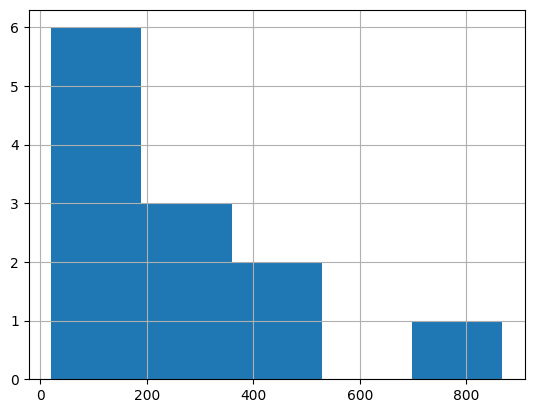

In [17]:
# If I have a problem rappresenting a data-point
df['D'].hist(bins=5)

<Axes: >

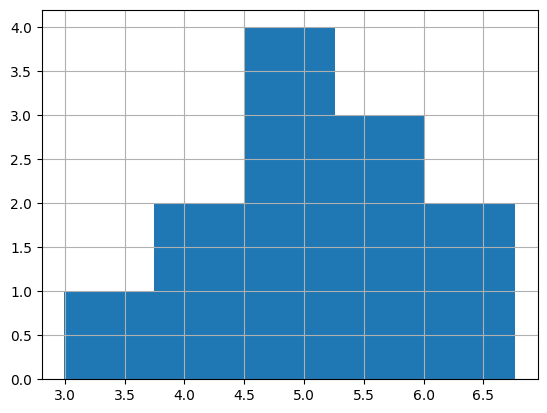

In [18]:
#I can quickly change the scale
df['D'] = np.log(df['D'])
df['D'].hist(bins=5)

In [19]:
# More Options. Given:
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c, 'D' : d})
df

,A,B,C,D
0,chicos,0.296234,18.000000,20
1,chicos,-0.529381,18.636364,63
2,chicos,1.109222,19.272727,140
3,chicos,-0.364855,19.909091,165
4,chicos,-1.048680,20.545455,178
5,chicos,NaN,21.181818,63
6,chicos,1.241353,21.818182,191
7,chicas,-1.029007,22.454545,364
8,chicas,-0.130674,23.090909,260
9,chicas,2.093565,23.727273,234


In [20]:
# yuou can calculate Trnsposte :
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
A,chicos,chicos,chicos,chicos,chicos,chicos,chicos,chicas,chicas,chicas,chicas,chicas
B,0.296234,-0.529381,1.109222,-0.364855,-1.04868,NaN,1.241353,-1.029007,-0.130674,2.093565,0.351292,-1.575654
C,18.0,18.636364,19.272727,19.909091,20.545455,21.181818,21.818182,22.454545,23.090909,23.727273,24.363636,25.0
D,20,63,140,165,178,63,191,364,260,234,867,480


In [21]:
# sorting:
df.sort_values(by='D')

,A,B,C,D
0,chicos,0.296234,18.000000,20
1,chicos,-0.529381,18.636364,63
5,chicos,NaN,21.181818,63
2,chicos,1.109222,19.272727,140
3,chicos,-0.364855,19.909091,165
4,chicos,-1.048680,20.545455,178
6,chicos,1.241353,21.818182,191
9,chicas,2.093565,23.727273,234
8,chicas,-0.130674,23.090909,260
7,chicas,-1.029007,22.454545,364


In [22]:
#select specific column:
df['A']

0     chicos
1     chicos
2     chicos
3     chicos
4     chicos
5     chicos
6     chicos
7     chicas
8     chicas
9     chicas
10    chicas
11    chicas
Name: A, dtype: object

In [23]:
#slice 
df[0:3]

,A,B,C,D
0,chicos,0.296234,18.000000,20
1,chicos,-0.529381,18.636364,63
2,chicos,1.109222,19.272727,140


In [24]:
# more columns
df.loc[:,['A','B']]

,A,B
0,chicos,0.296234
1,chicos,-0.529381
2,chicos,1.109222
3,chicos,-0.364855
4,chicos,-1.048680
5,chicos,NaN
6,chicos,1.241353
7,chicas,-1.029007
8,chicas,-0.130674
9,chicas,2.093565


In [25]:
#specific location (index)
df.iloc[3]

A       chicos
B    -0.364855
C    19.909091
D          165
Name: 3, dtype: object

In [26]:
#in generale slices specific
df.iloc[1:3,:]

,A,B,C,D
1,chicos,-0.529381,18.636364,63
2,chicos,1.109222,19.272727,140


In [27]:
# QUERIES:
df
df[df.D > 70]

,A,B,C,D
2,chicos,1.109222,19.272727,140
3,chicos,-0.364855,19.909091,165
4,chicos,-1.048680,20.545455,178
6,chicos,1.241353,21.818182,191
7,chicas,-1.029007,22.454545,364
8,chicas,-0.130674,23.090909,260
9,chicas,2.093565,23.727273,234
10,chicas,0.351292,24.363636,867
11,chicas,-1.575654,25.000000,480


In [28]:
#multiple:
df[(df.D > 70) & (df.C > 23)]

,A,B,C,D
8,chicas,-0.130674,23.090909,260
9,chicas,2.093565,23.727273,234
10,chicas,0.351292,24.363636,867
11,chicas,-1.575654,25.000000,480


---

---

# Ejercicio 1

- Leer los datos de Centroides_NucleosPoblacion.csv

- Explicar la descripción estadística básica de los datos, entradas, medias, etc.

- Visualizaciones respecto a variables relevantes (histograms, box-plots)


Preguntas rápidas:
    
- municipio mas poblado, menos pobloado

- municipios con menos de 11000 habitantes

- Quinto municipio mas poblado

- 10 municipios de menor poblacion


---

# Ejercicio 2

- Leer los datos (estaciones.csv, precipitaciones.csv)

- Creamos una serie con las fechas

- Creamos un nuevo dataset añadiendo dos columnas de mes y año

- Calculamos las medias por estacion y año y mes

- Visualizamos la distribución espacial

- Eliminamos la columna de fecha

- Calculamos la frecuencia de dias con precipitaciones mayores que 10

---

# Ejercicio 3

- Leemos el dataset correspondiente `pokemon.xlsx`
- Muestra los valores de las tres primeras filas. Sigue algún orden?
- Muestro solo los nombres 
- Cual es el número de entradas del df
- Muestra informaciones generales del df
- Calcula el número de nulos por columna
- Calcula el número de legendarios. 
- Encontrad en el dataset algún pokemon que conozcáis (si no conocéis os dejo una pista -> pikachu 😉)
- Muestra solo las líneas respecto a esta lista de pokemon ['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle']
- Asignalo a un nuevo df
- Creamos una gráfica de barras que compare alguna de las estadísticas
- Renombrar la columna # por Número
- Asignar a una variable un df con solo los pokemon comunes
- Comprobad el número de pokemon por cada número. Si existen duplicados documentalo y elimina
- Que tipo de pokemon es más fuerte (TOTAL)

---

# Ejercicio 4

- Leemos los datos winemag-data_first150k

- Asigna a una variable la columna de descripciones

- Asigna el primer valor de la columna descripciones a una variable

- Selecciona los 10 primeros valores de la columna descipcion y asignales el primer valor

- Crea una variable donde recogas un dataframe con las columnas country, provincia, region con indices 0,1,10,100.

- Crea un dataframe de vinos italianos

- Crea un dataframe de vinos de oceania con al menos 95 puntos 

- Cual es la mediana de puntos

- Que paises estan representados

- Cuantas veces aparece cada pais en el dataframe, crea un dataframe que represente ese mapeo

- Crea una variable de precio centrado que consiste en restar la media de la columna precio al precio

- Cual es el vino con el mejor ratio puntos/precio

- Crea una serie que calcule el numero de veces que aparecen las palabras "tropical" y "fruity" en el dataset

- Modifica el sistema de rating de 0-100 a 0-3 estrellas. Un rating de 95 o superior corresponde con 3 estrellas, un rating de 85 o superior con 2 estrellas. Cualquier otro rating 1 estrella